In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\ankit\OneDrive\Desktop\dataset - netflix1.csv")

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
df['director'] = df['director'].replace('Not Given', np.NaN)

In [6]:
df['country'] = df['country'].replace('Not Given', np.NaN)

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2588
country          287
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64

In [8]:
df1 = df.dropna(axis=0, how ='any')

In [9]:
df1.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [10]:
len(df1)

5915

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='release_year'>

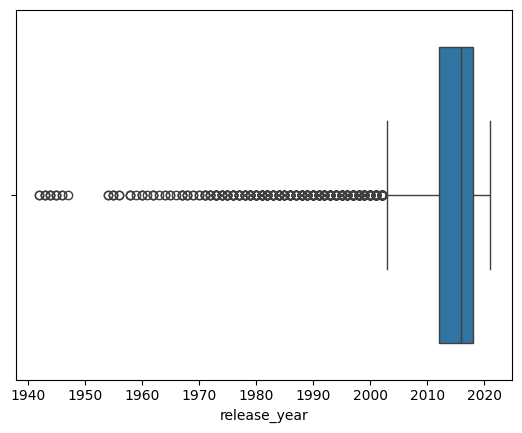

In [12]:
sns.boxplot (x= df1['release_year'])

In [13]:
df1.describe()

,release_year
count,5915.000000
mean,2013.014708
std,9.693770
min,1942.000000
25%,2012.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [14]:
upper_limit = 2018+1.5*6
lower_limit = 2012-1.5*6

In [15]:
new_data1 = df1[(df1['release_year']>lower_limit) & (df1['release_year']<upper_limit)]

<Axes: xlabel='release_year'>

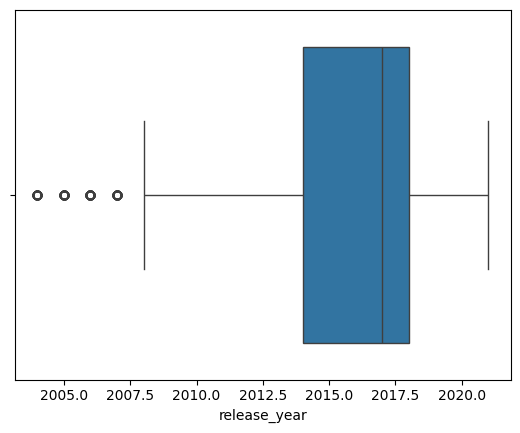

In [16]:
sns.boxplot( x = new_data1['release_year'])

In [17]:
lower_limit = 2018-1.5*6

In [18]:
new_data2 = df1[(df1['release_year']<upper_limit) & (df1['release_year']>lower_limit)]

<Axes: xlabel='release_year'>

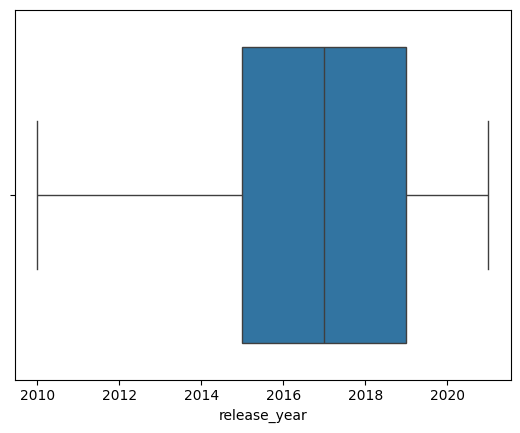

In [20]:
sns.boxplot(x = new_data2['release_year'])

In [21]:
len(new_data2)

4777

In [22]:
df2 = new_data2.copy()

In [23]:
df2.type.value_counts()

type
Movie      4569
TV Show     208
Name: count, dtype: int64

In [24]:
df2['country'].value_counts()

country
United States     1830
India              726
United Kingdom     339
Canada             179
France             143
                  ... 
Zimbabwe             1
Mozambique           1
Namibia              1
Cameroon             1
Croatia              1
Name: count, Length: 76, dtype: int64

Text(0.5, 1.0, 'count vs types of show')

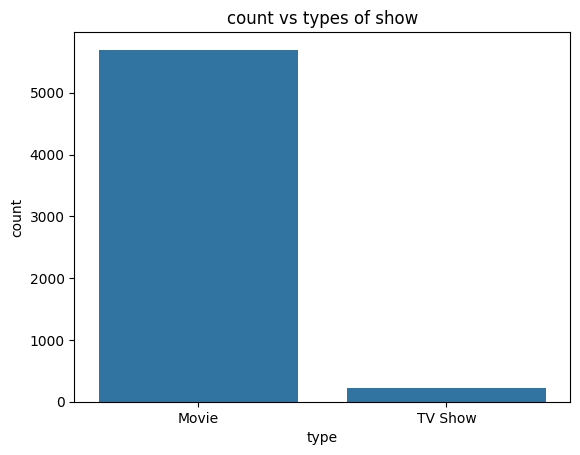

In [25]:
sns.countplot(x=df1['type'])
plt.title("count vs types of show")

Text(0.5, 1.0, 'Country Wise- Netflix Content')

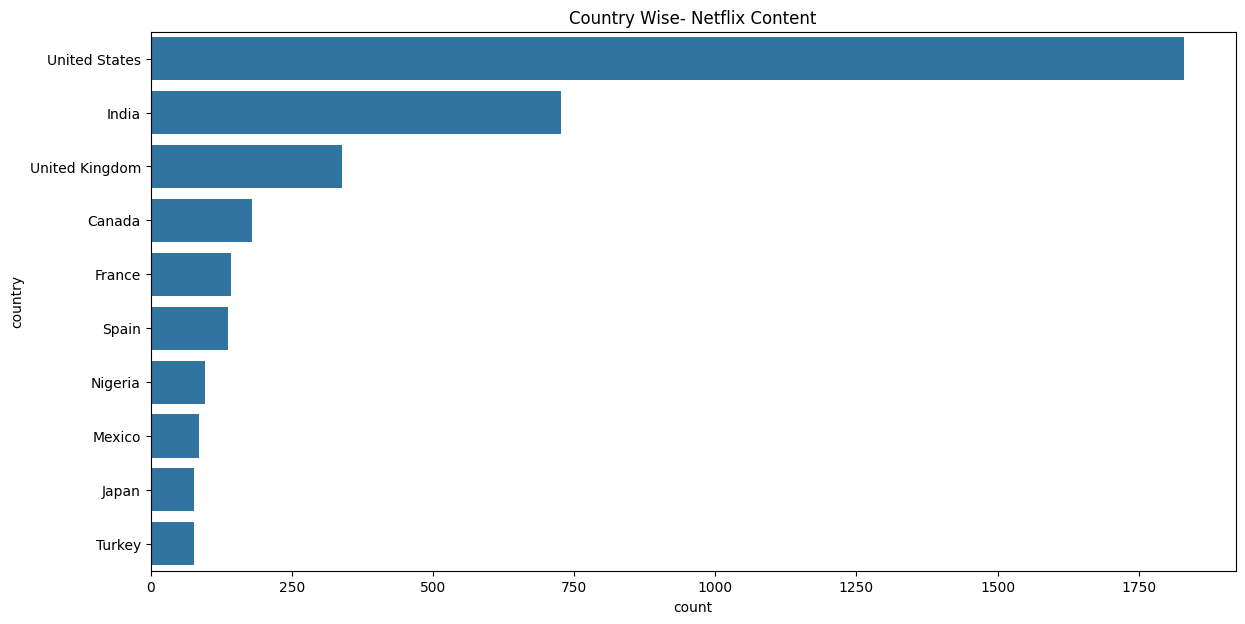

In [28]:
plt.figure(figsize=(14,7))
sns.countplot(y = df2['country'], order = df2['country'].value_counts().index[0:10])
plt.title('Country Wise- Netflix Content')

<function matplotlib.pyplot.show(close=None, block=None)>

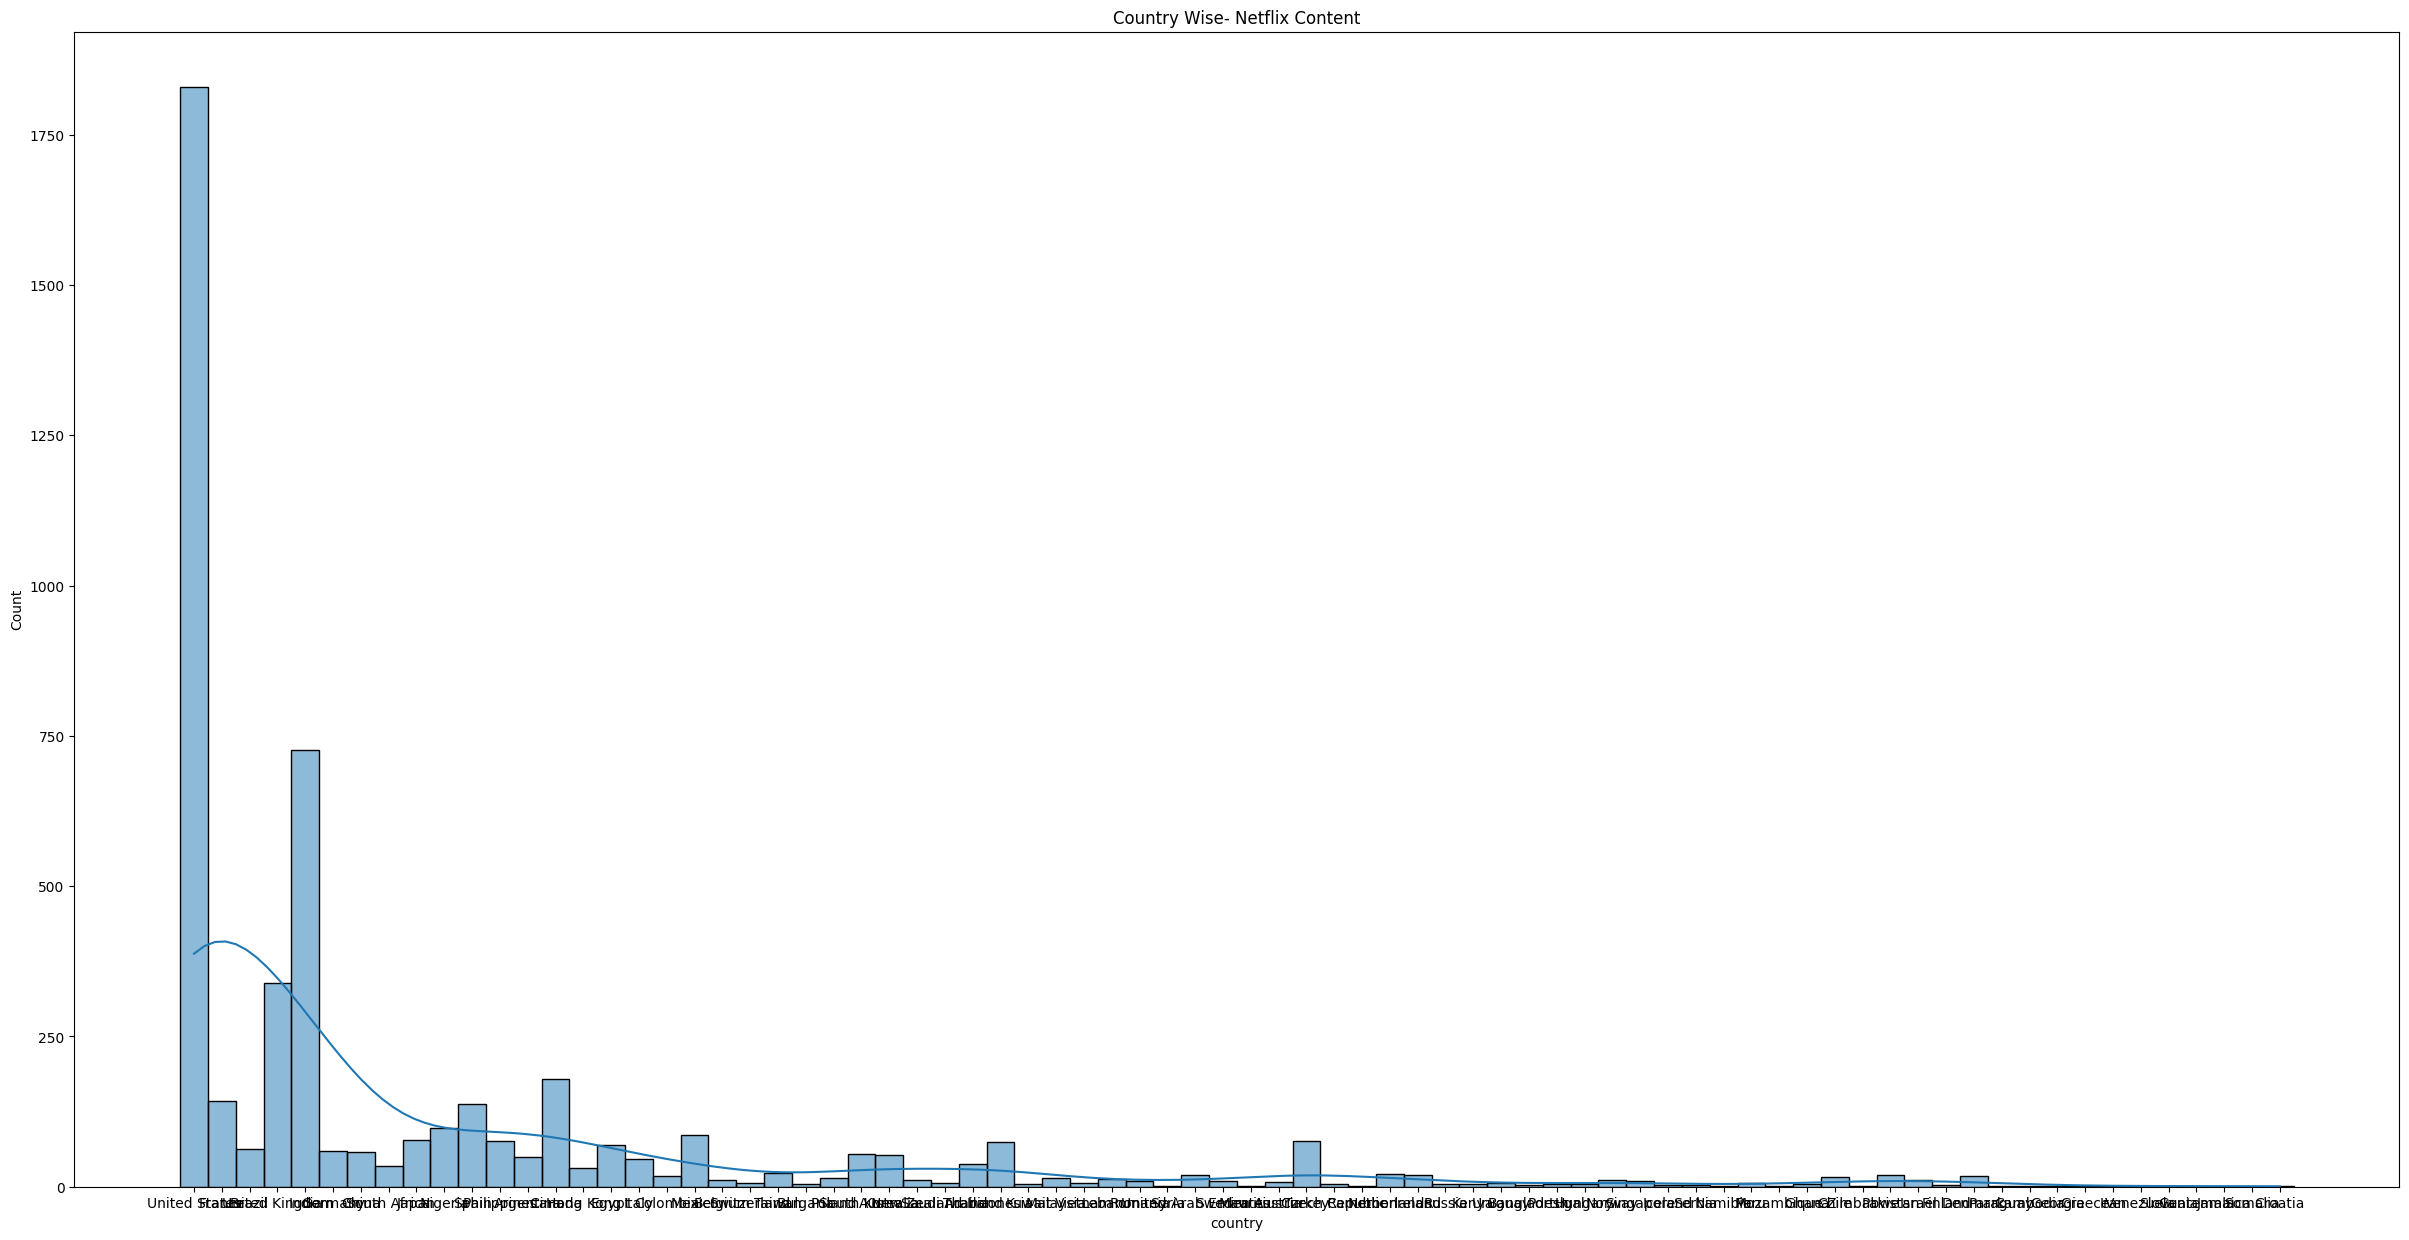

In [35]:
plt.figure(figsize = (30,15))
sns.histplot(df2['country'], bins = 30, kde = True)
plt.title('Country Wise- Netflix Content')
plt.show

In [42]:
movie_countries = df2[df2['type'] == 'Movie']
tv_shows_countries = df2[df2['type']== 'TV Show']

Text(0.5, 1.0, 'Top 5 Contries- Movies On Netflix')

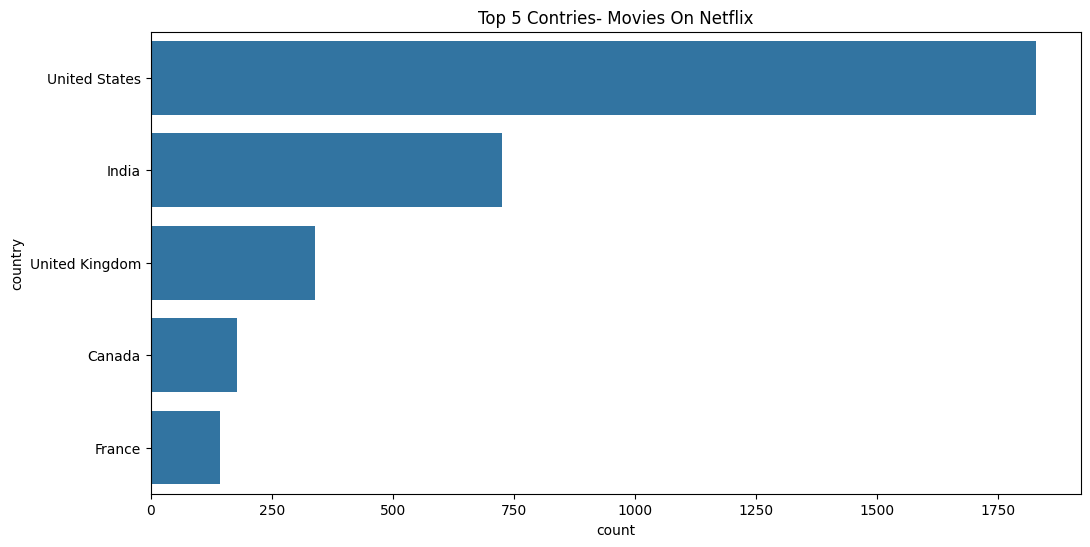

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(y = df2['country'], order = df2['country'].value_counts().index[0:5])
plt.title("Top 5 Contries- Movies On Netflix")

Text(0.5, 1.0, 'Top 10  Countries- TV Shows On Netflix')

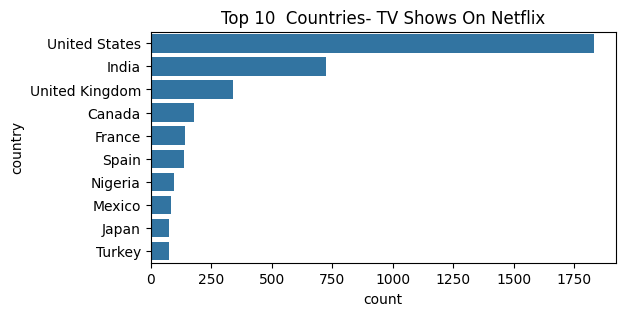

In [46]:
plt.figure(figsize = (6,3))
sns.countplot(y= df2['country'], order = df2['country'].value_counts().index[0:10])
plt.title('Top 10  Countries- TV Shows On Netflix')

Text(0.5, 1.0, 'Top 20 Directors Show On Netflix')

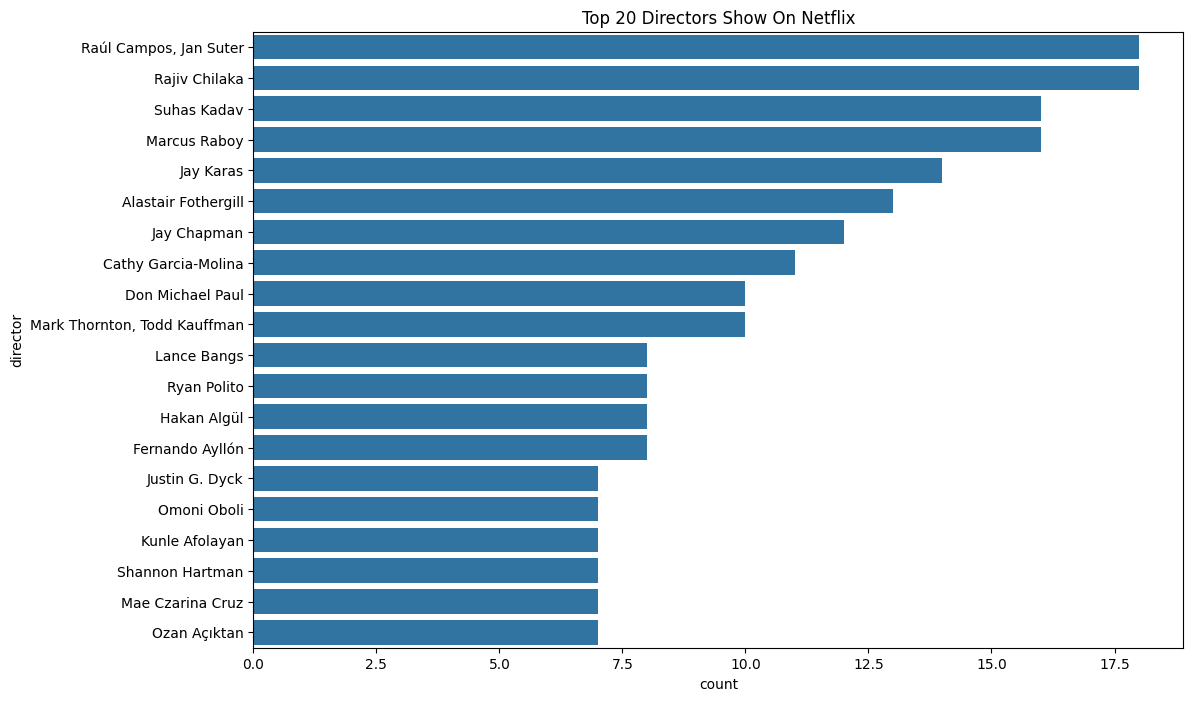

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(y = df2['director'], order = df2['director'].value_counts().index[0:20])
plt.title("Top 20 Directors Show On Netflix")

Text(0.5, 1.0, 'Rating Of Shows vs Count - Netflix')

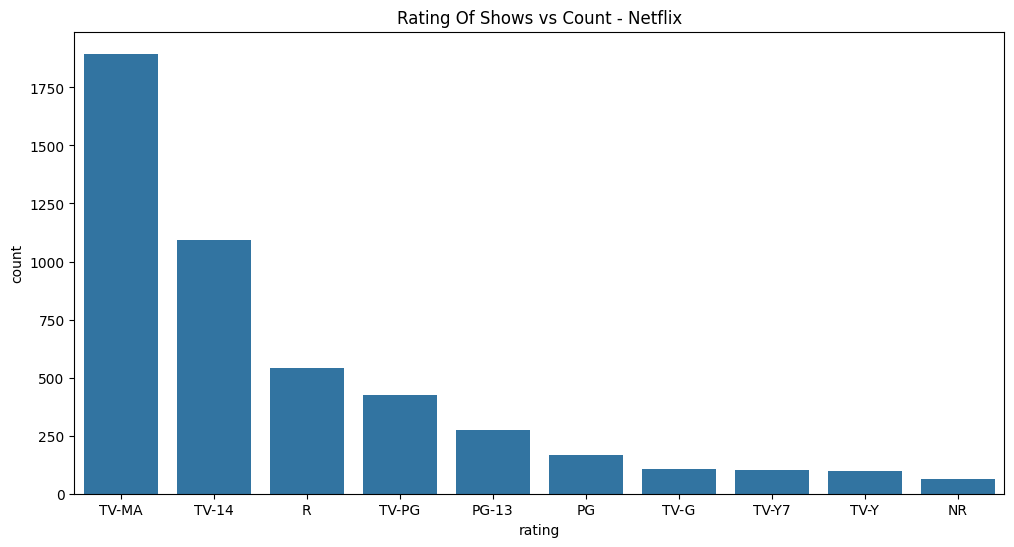

In [50]:
plt.figure(figsize = (12,6))
sns.countplot(x=df2['rating'], order = df2['rating'].value_counts().index[0:10])
plt.title("Rating Of Shows vs Count - Netflix")

In [51]:
df2['release_year'].value_counts()

release_year
2017    744
2018    730
2016    645
2019    598
2020    503
2015    386
2014    262
2013    223
2021    219
2012    175
2010    148
2011    144
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 20 genres On Netflix')

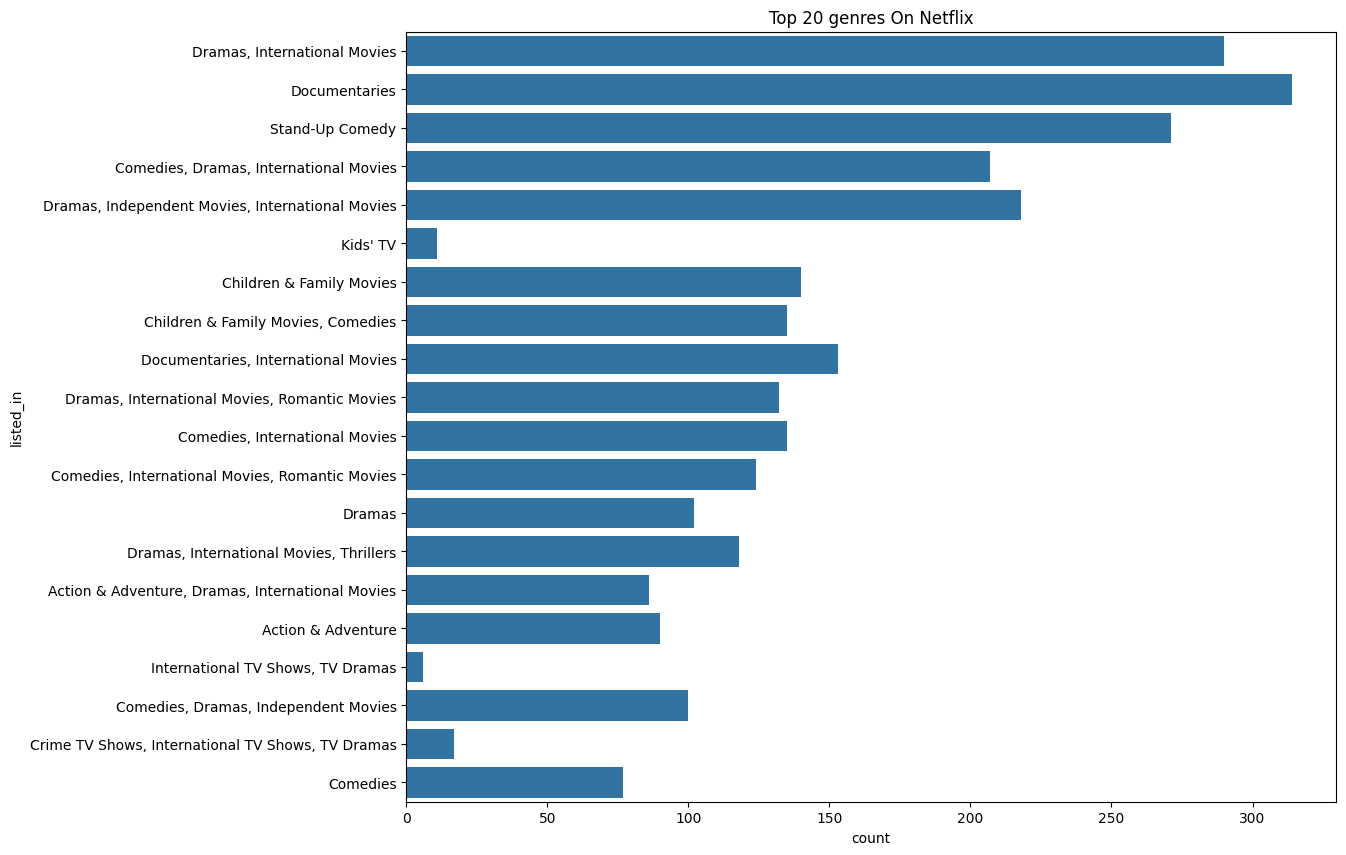

In [53]:
plt.figure(figsize= (12,10))
sns.countplot(y=df2['listed_in'], order= df['listed_in'].value_counts().index[0:20])
plt.title('Top 20 genres On Netflix')